In [1]:
#This notebook is for visualizing uncalibrated neural likelihood surfaces for the evaluation data.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [4]:
local_folder = "/home/juliatest/Desktop/likelihood_free_inference/neural_likelihood/gaussian_process"
version = "final_version"
image_size = 25
image_name = str(image_size) + "_by_" + str(image_size)

psi_fields =  np.load((local_folder + "/evaluate_nn/produce_neural_likelihood_surfaces/data/" + image_name + "/" 
                       + version + "/uncalibrated/single/reps/200/uncalibrated_neural_likelihood_surfaces_10_by_10_density_" 
                       + image_name + "_image_200.npy"))
#first column is variance and second is lengthscale
parameter_matrix = np.load((local_folder + "/evaluate_nn/generate_data/data/" + image_name + 
                            "/single/reps/200/evaluation_parameters_10_by_10_density_" + image_name + "_200.npy"))
parameter_matrix = parameter_matrix[:,0,:]

In [9]:
#Save a png file of the uncalibrated neural surface.
#function parameters:
    #uncalibrated_neural_likelihood_surface: (numpy matrix) uncalibrated neural likelihood surface for a realization of the GP from
    # evaluation data
    #true_length_scale: the length scale value which generated the realization for this uncalibrated neural likelihood surface
    #true_variance: the variance value which generated the realization for this uncalibrated neural likelihood surface
    #possible_length_scales: length scales values on the parameter grid
    #possible_variances: variance values on the parameter grid
    #C: the critical value for around 90 percent coverage according to Wilk's Thrm (multiple realizations) and the range of the
    #color scale (ranges from max of the field to max of the field minus C)
    #rep_number: the replication number that identifies the realization which produced the given uncalibrated neural likelihood surface
def visualize_uncalibrated_neural_likelihod_surface(uncalibrated_neural_likelihood_surface, true_length_scale, true_variance, 
                                                    possible_length_scales, possible_variances, C, rep_number):

    fig, ax = plt.subplots(figsize = (10,10))
    x = np.linspace(.05, 2, len(possible_length_scales))
    y = np.linspace(.05, 2, len(possible_variances))
    X, Y = np.meshgrid(x, y)
    
    psi_field = uncalibrated_neural_likelihood_surface
    psi_field[psi_field == 0] = np.amin(psi_field[psi_field != 0])
    Z = np.log(psi_field)
    max_indices = np.unravel_index(np.argmax(Z, axis=None), Z.shape)
    max_length_scale = possible_variances[max_indices[1]]
    max_variance = possible_length_scales[max_indices[0]]

    ax.contourf(X, Y, Z, vmin = (np.amax(Z) - C), vmax = np.amax(Z), levels = 12000)
    ax.scatter(true_length_scale, true_variance, s = 600, marker = "*", c = "black")
    ax.scatter(max_length_scale, max_variance, s = 600, marker = "o", c= "red")
    legend_elements = [Line2D([0], [0], marker='*', color='w', label='True',
                          markerfacecolor='black', markersize=40), 
                          Line2D([0], [0], marker='o', color='w', label='Estimate',
                          markerfacecolor='red', markersize=30)]
    ax.legend(handles = legend_elements, facecolor='white', framealpha=1, fontsize="25")
    ax.set_xlabel("length scale", fontsize = 40)
    ax.set_ylabel("variance", fontsize = 40)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize =20)
    plt.tight_layout()

    fig_name = (local_folder + "/evaluate_nn/visualizations/visualize_surfaces/surfaces/" + image_name +
                "/neural_likelihood/" + version + "/uncalibrated/single/reps/200/" + str(C) + "_" + 
                "uncalibrated_neural_likelihood_surface_length_scale_" + str(true_length_scale) + 
                "_variance_" + str(true_variance) + "_rep_" + str(rep_number) + ".png")
    plt.savefig(fig_name)

Locator attempting to generate 10889 ticks ([-35.212, ..., 8.339999999999996]), which exceeds Locator.MAXTICKS (1000).


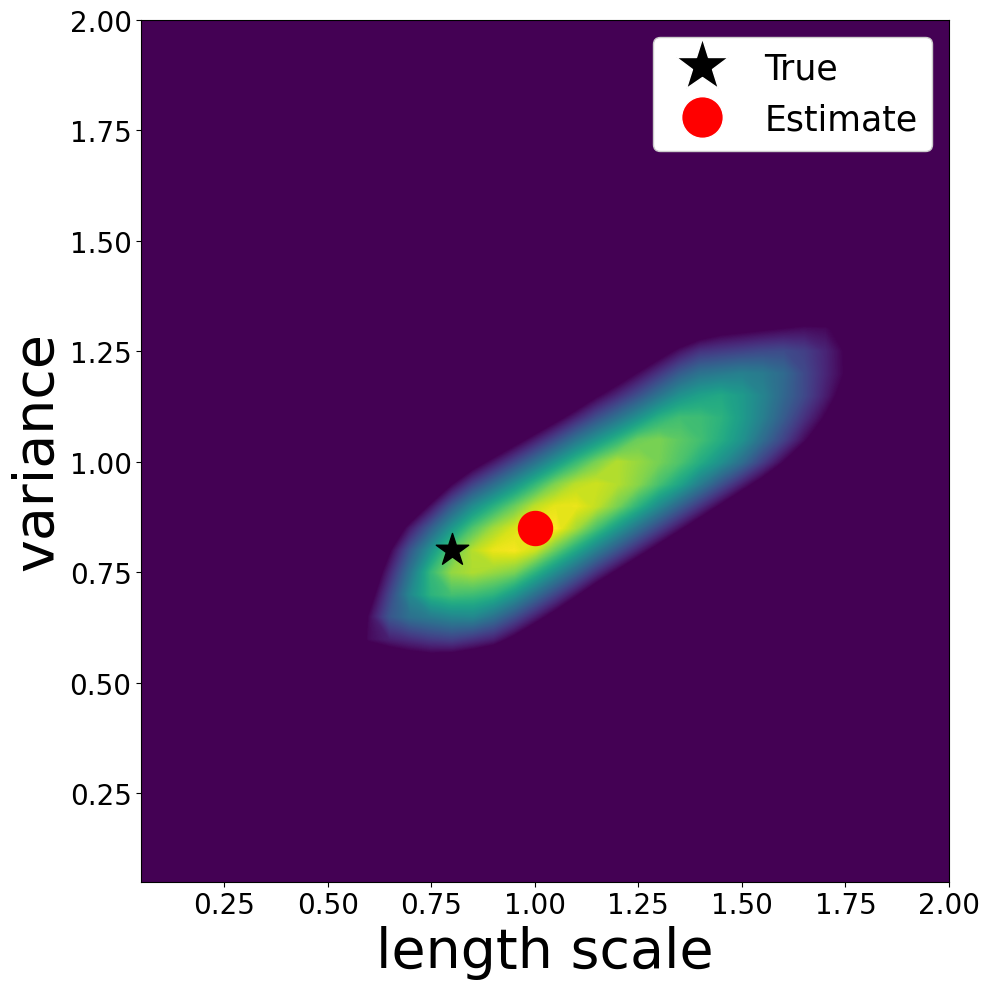

In [10]:
true_params = np.array([(.2*j, .2*i) for i in range(1, 11) for j in range(1, 11)])
possible_length_scales = [.05*i for i in range(1,41)]
possible_variances = [.05*i for i in range(1,41)]
indices = [11, 13, 15, 17, 31, 33, 35, 37, 51, 53, 55, 57, 71, 73, 75, 77]
C = 10

for ipred in [33]:
    for irep in range(12,13):
        true_length_scale = parameter_matrix[ipred,1]
        true_variance = parameter_matrix[ipred,0]
        uncalibrated_neural_likelihood_surface = psi_fields[ipred,irep,:,:]
        visualize_uncalibrated_neural_likelihod_surface(uncalibrated_neural_likelihood_surface, true_length_scale, true_variance,
                                                         possible_length_scales, possible_variances, C, irep)
        
